<a href="https://colab.research.google.com/github/iremegrikaya/HumanCount/blob/main/dog_breed_VGG16ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**VGG-16 | CNN model**

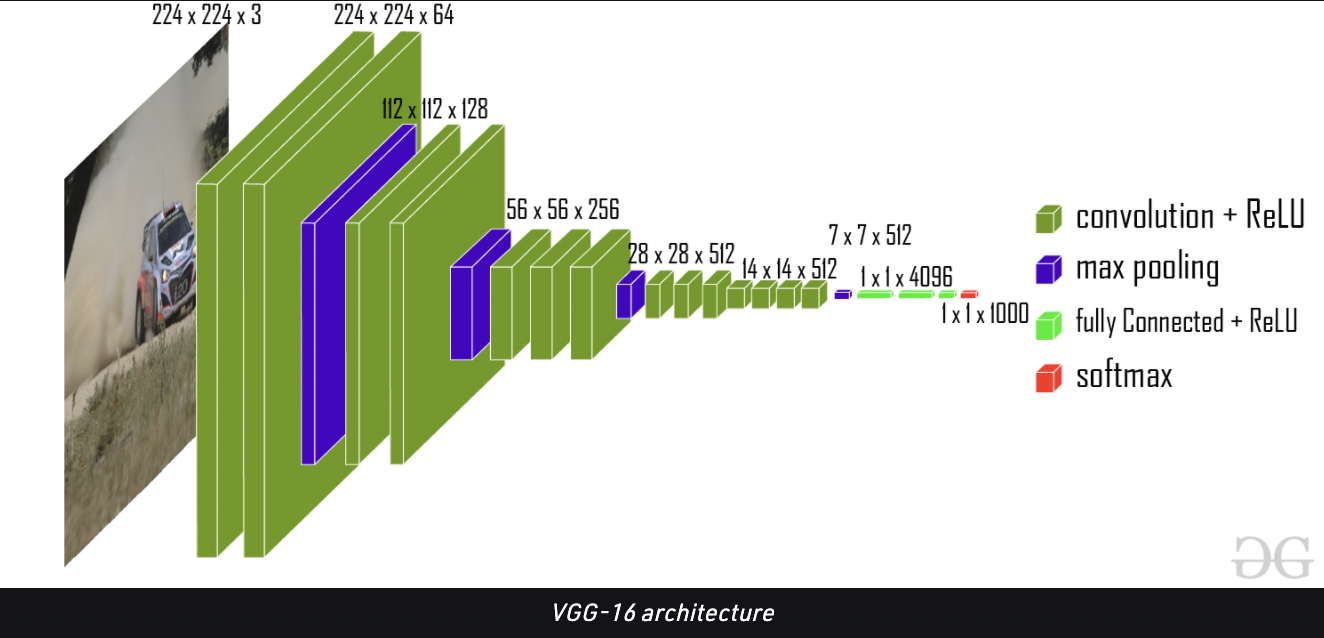

VGG16 is a simple and widely used Convolutional Neural Network (CNN) Architecture used for ImageNet, a large visual database project used in visual object recognition software research. The VGG16 Architecture was developed and introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford, in the year 2014, through their article “Very Deep Convolutional Networks for Large-Scale Image Recognition.” ‘VGG’ is the abbreviation for Visual Geometry Group, which is a group of researchers at the University of Oxford who developed this architecture, and ‘16’ implies that this architecture has 16 layers (explained later).

VGG16 is used in many deep learning image classification techniques and is popular due to its ease of implementation. VGG16 is extensively used in learning applications due to the advantage that it has.

In [1]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/dog-breed-identification.zip

Archive:  /content/drive/MyDrive/dog-breed-identification.zip
replace labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
import numpy as np 
import pandas as pd 



import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import glob
import cv2
import h5py
import os
import datetime
import time
import re
from tqdm import tqdm
import matplotlib as plt



In [5]:
train_path = "/content/train"
test_path = "/content/test"

In [6]:
labels_df= pd.read_csv("/content/labels.csv")

In [7]:
labels_df.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
class_names = labels_df['breed'].value_counts()[:30].index.tolist()

In [9]:
labels_df = labels_df[labels_df['breed'].isin(class_names)] #isin() method is used to filter data frames.

In [10]:
labels_df.reset_index(drop = True, inplace = True)
labels_df.head()

,id,breed
0,003df8b8a8b05244b1d920bb6cf451f9,basenji
1,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
2,00693b8bc2470375cc744a6391d397ec,maltese_dog
3,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier
4,00bee065dcec471f26394855c5c2f3de,cairn


In [11]:
n = len(labels_df)
breed = set(labels_df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
n_class = len(breed)

In [12]:
range(n_class)

range(0, 30)

In [14]:
n_class

30

In [15]:
class_to_num

{'afghan_hound': 8,
 'airedale': 27,
 'australian_terrier': 9,
 'basenji': 1,
 'beagle': 14,
 'bernese_mountain_dog': 12,
 'blenheim_spaniel': 10,
 'cairn': 17,
 'chow': 21,
 'entlebucher': 11,
 'great_pyrenees': 13,
 'irish_wolfhound': 22,
 'italian_greyhound': 24,
 'japanese_spaniel': 2,
 'lakeland_terrier': 28,
 'leonberg': 19,
 'maltese_dog': 7,
 'miniature_pinscher': 23,
 'norwegian_elkhound': 29,
 'papillon': 4,
 'pembroke': 15,
 'pomeranian': 25,
 'pug': 18,
 'saluki': 3,
 'samoyed': 0,
 'scottish_deerhound': 16,
 'shih-tzu': 6,
 'siberian_husky': 5,
 'tibetan_terrier': 20,
 'whippet': 26}

In [16]:
print(n_class)

30


In [33]:
sample = labels_df['breed'].value_counts()[:30]
print(sample[0:5])

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64


Review with using seaborn

Text(0.5, 1.0, 'Distribution of the Dog Breeds')

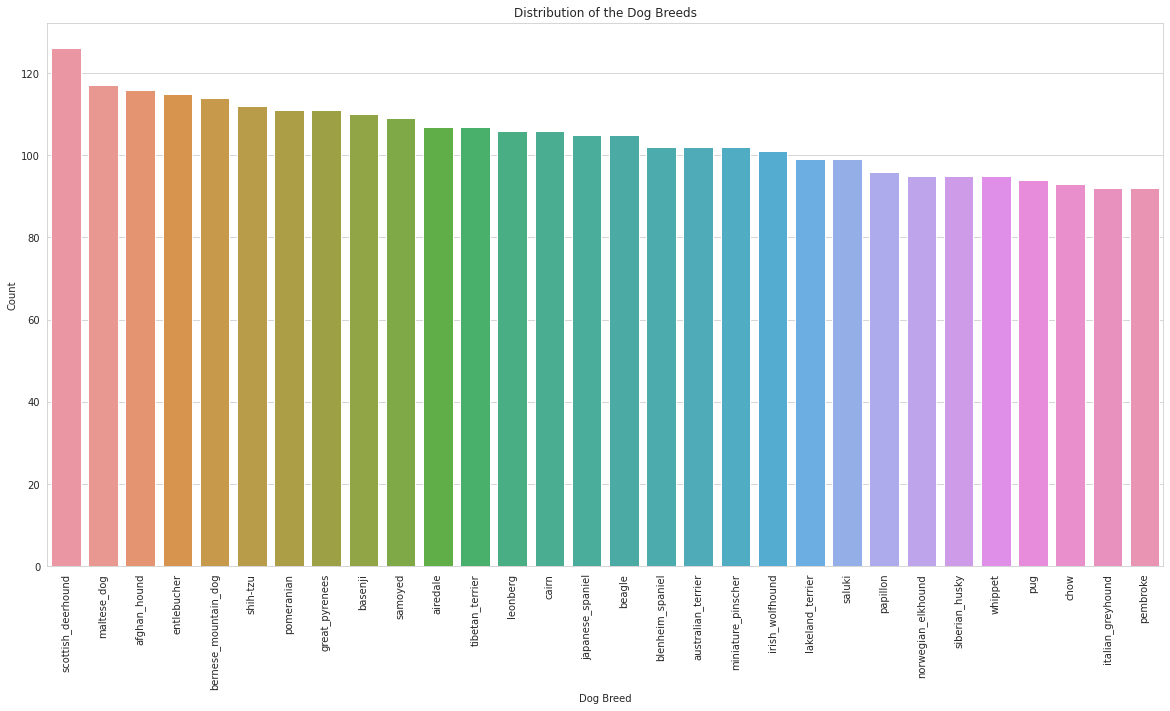

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set_style("whitegrid")

ax = sns.barplot(x = sample.index, y = sample, data = labels_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of the Dog Breeds')

We will use Pandas to convert df_train into a series and get_dummies to do one hot encoding

In [19]:
targets_series = pd.Series(labels_df['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot_labels = np.asarray(one_hot)

read, resize and one hot encoder for dataset

In [31]:
import cv2
img_size = 224
original_label = []
X = np.zeros((n, img_size, img_size, 3), dtype=np.uint8)
y = np.zeros((n, n_class), dtype=np.uint8)
original_label = []
for i in tqdm(range(n)):
    X[i] = cv2.resize(cv2.imread('/content/train/%s.jpg' % labels_df['id'][i]), (img_size, img_size))
    y[i] = one_hot_labels[i]
    original_label.append(labels_df['breed'][i])

100%|██████████| 3134/3134 [00:14<00:00, 210.08it/s]


In [32]:
print(original_label[0:5])

['basenji', 'scottish_deerhound', 'maltese_dog', 'lakeland_terrier', 'cairn']


In [35]:
print("Number of Samples:",X.shape[0])
print(y.shape)
num_class = y.shape[1]
print("Number of training lables:",num_class)

Number of Samples: 3134
(3134, 30)
Number of training lables: 30


In [24]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf 
import seaborn as sns

import cv2
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from PIL import Image



from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD

from tensorflow.keras.utils import to_categorical

In [25]:
# split the data into train and test sets.
# for train = 80%
# for test = 20%
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)


In [ ]:
vgg = VGG16(include_top = False, weights = "imagenet", input_shape = (224,224,3))

print(vgg.summary())

vgg_layer_list = vgg.layers

print(vgg_layer_list)

model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)
    
print(model.summary())

for layer in model.layers:
    layer.trainable = False

# fully connected layers
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(n_class, activation= "softmax"))

print(model.summary())


model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 10)

#model save
model.save("example.h5")

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

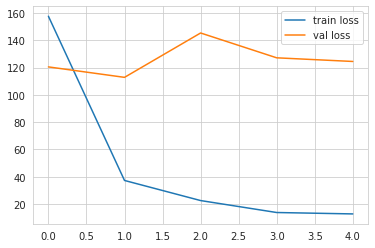

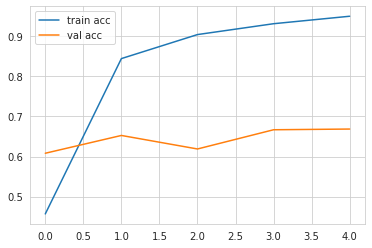

In [37]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["accuracy"], label = "train acc")
plt.plot(hist.history["val_accuracy"], label = "val acc")
plt.legend()
plt.show()

Change the name of h5 file

In [39]:
#load the model
model_new = load_model("VGG.h5")

In [43]:
y_prediction = model_new.predict(x_test)
print(y_prediction)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
